# **NAME**- SWASTIK ROY CHOUDHURY

### **Email Id** - swastikroychoudhury014@gmail.com



# **Title**
**FutureCart**: *AI-Driven Demand Prediction for Smarter Retail.*

# **Project Statement:**
In the realm of E-commerce, demand forecasting plays a pivotal role in ensuring business success. This project aims to develop a demand forecasting model in an E-commerce business that predicts future product demand leveraging time series analysis and multivariate regression based on historical sales data, along with Google Analytics KPIs such as Google clicks and Facebook impressions, which are valuable indicators of customer interest.

# **Outcomes**

**>Improved Inventory Management:** More accurate demand forecasts lead to better inventory decisions, potentially reducing stock-outs and excess inventory.

**>Enhanced Marketing Efficiency:** Identify periods of high demand for targeted marketing campaigns, optimizing resource allocation.

**>Data-Driven Decision Making:** Reliable forecasts provide a basis for business decisions, such as pricing adjustments or product promotions.

**>Accurate Demand Predictions:** Implement a forecasting model that achieves high accuracy in predicting future demands, thereby improving customer service levels.

**>Scalable Solution:** Develop a solution that can scale to handle large datasets and varying demand patterns across multiple products.

# **Milestone 1: Week 1**
# Module 1: Data Collection
• Understanding the problem statement

• Gathering sales data from relevant sources (database, store records)

• Collecting Google Analytics and Facebook Impressions data

In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Datasets Used**

In [ ]:
import pandas as pd

# Loading the Excel files from your Google Drive
df1 = pd.read_excel('/content/drive/MyDrive/Data/ProductA.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_fb_impressions.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_google_clicks.xlsx')

# Displaying the first 5 rows of each DataFrame
print("Top 5 rows of ProductA.xlsx:")
print(df1.head())

print("\nTop 5 rows of ProductA_fb_impressions.xlsx:")
print(df2.head())

print("\nTop 5 rows of ProductA_google_clicks.xlsx:")
print(df3.head())


Top 5 rows of ProductA.xlsx:
   Day Index  Quantity
0 2021-12-01        14
1 2021-12-02        10
2 2021-12-03        13
3 2021-12-04        22
4 2021-12-05        33

Top 5 rows of ProductA_fb_impressions.xlsx:
   Day Index  Impressions
0 2021-12-01          620
1 2021-12-02          890
2 2021-12-03          851
3 2021-12-04          881
4 2021-12-05          678

Top 5 rows of ProductA_google_clicks.xlsx:
   Day Index  Clicks
0 2021-12-01     445
1 2021-12-02     433
2 2021-12-03     424
3 2021-12-04     427
4 2021-12-05     451


# **MERGING THE DATASETS INTO A MASTER DATASET**

In [ ]:
import pandas as pd

# Loading the Excel files from Google Drive
df1 = pd.read_excel('/content/drive/MyDrive/Data/ProductA.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_fb_impressions.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_google_clicks.xlsx')

# Merge the DataFrames on 'Day Index' using left join
merged_df = df1.merge(df2, how="left", on='Day Index').merge(df3, how="left", on='Day Index')

# All rows and columns of the merged DataFrame are displayed below
print(merged_df)

# Saving the merged DataFrame to a new Excel file
output_file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
merged_df.to_excel(output_file_path, index=False)
print(f"Merged dataset saved as '{output_file_path}'")



     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]
Merged dataset saved as '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'


# **Milestone 1: Week 2**
# Module 2: Exploratory Data Analysis (EDA) and Data Preprocessing

• Ensuring my sales data is in a time series format (e.g., daily, weekly, monthly) with timestamps.

• Cleaning and formating data, handling missing values and outliers. Address them using appropriate techniques (imputation, elimination).

• Ploting the distribution plots on independent variables.

• Visualizations to understand trends, seasonality, and correlations.

• Statistical summaries.

# **BASIC CHECKS ON DAILY TRENDS**

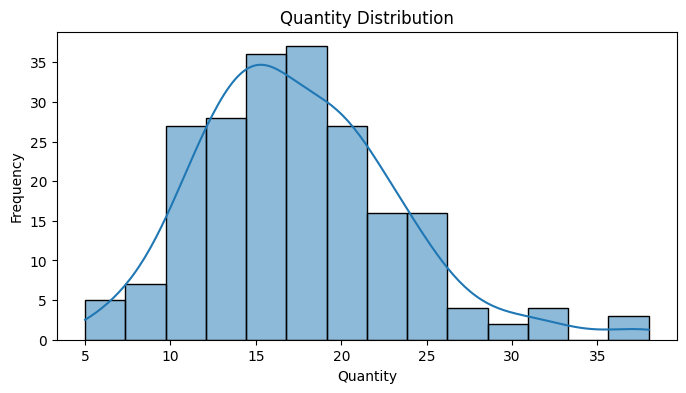

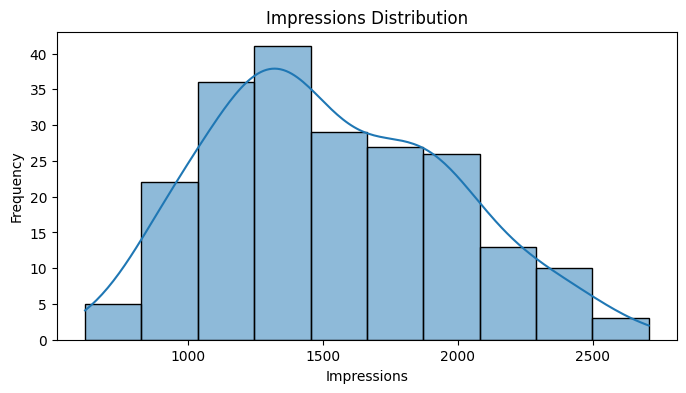

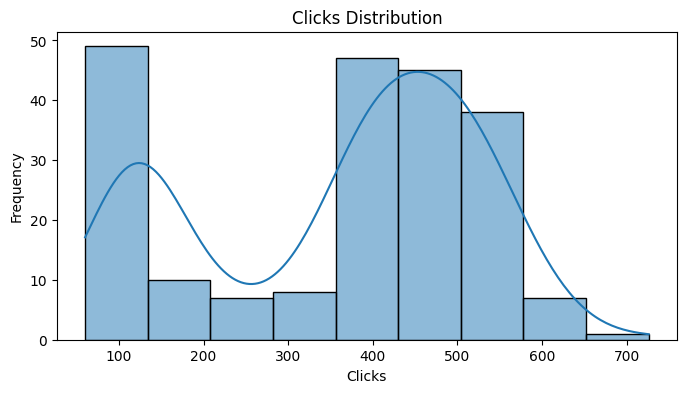

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

## Distribution Plots with Insights
for col in ['Quantity', 'Impressions', 'Clicks']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **Observations from the Distribution Plots**

- I analyzed the distribution of **Quantity**, **Impressions**, and **Clicks** to understand the data spread and identify any skewness or outliers.
- Here are my insights from each distribution plot:

   1. Each plot clearly shows the overall data spread for the respective feature, helping me identify skewness or outliers in the data.
   2. Peaks within these distributions indicate common value ranges, suggesting typical behavior or stable periods.
   3. Higher peaks likely represent frequent events or periods with steady demand, providing insights into regular patterns.
   4. Valleys or dips in the distributions reveal less common occurrences, potentially pointing to gaps or less frequent demand.
   5. These plots are essential for assessing the data distribution, identifying unusual data points, and informing any data cleaning steps required.

# **SALES(QUANTITY THROUGH TIME)**

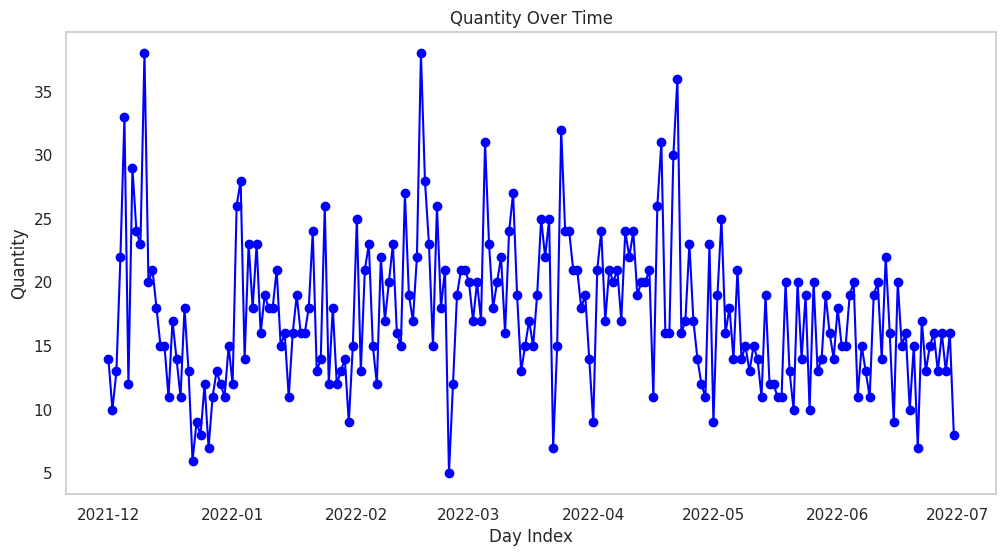

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path)

# Plot Quantity over time (Day Index)
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Quantity'], color='blue', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid()
plt.show()


**Detecting Missing Values and Cleaning Dataset**

In [ ]:
import pandas as pd

# Loading the uploaded Excel file

data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# Finding missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


**No Missing Values Detected**

# **DROPPING DUPLICATES**

In [ ]:
import pandas as pd

# Load the uploaded Excel file
data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# Drop duplicate rows
data = data.drop_duplicates()

# Verify if duplicates are dropped
print("Number of rows after dropping duplicates:", data.shape[0])


Number of rows after dropping duplicates: 212


# **BOXPLOTS**

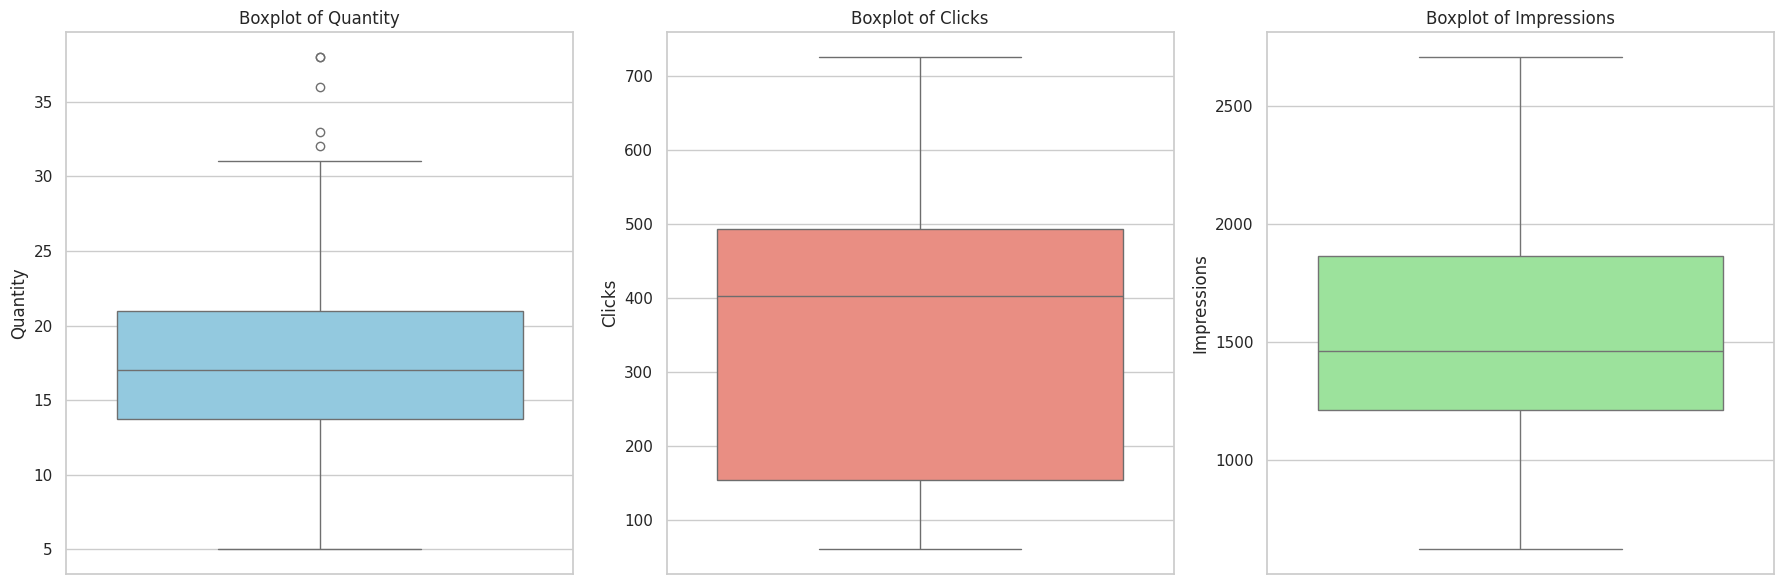

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path)

# Set style for plots
sns.set(style="whitegrid")

# Create boxplots for 'Quantity', 'Clicks', and 'Impressions' columns
plt.figure(figsize=(18, 6))

# Boxplot for 'Quantity'
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Quantity'], color='skyblue')
plt.title('Boxplot of Quantity')

# Boxplot for 'Clicks'
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Clicks'], color='salmon')
plt.title('Boxplot of Clicks')

# Boxplot for 'Impressions'
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Impressions'], color='lightgreen')
plt.title('Boxplot of Impressions')

plt.tight_layout()
plt.show()


# **DETECTING OUTLIERS**

In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    outliers = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]
    return outliers

print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df['Impressions']))}")


Outliers in each dependent attribute:
Quantity:	 5
Clicks:		 0
Impressions:	 0


In [ ]:
print(f"Quantity:\n{find_outliers_IQR(df['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


# **5 Outliers in Quantity Attribute**

# **REPLACING OUTLIERS**

In [ ]:
percentile_95_value =df["Quantity"].quantile(0.97)
print(percentile_95_value)

30.669999999999987


In [ ]:
def impute_outliers_97th_percentile(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    percentile_95_value =series.quantile(0.97)
    return series.apply(lambda x: percentile_95_value if x < lower_bound or x > upper_bound else x)

# Apply the function to the 'Quantity' column
df['imputed_Quantity'] = impute_outliers_97th_percentile(df['Quantity'])

print(df.head())

# I am saving the modified dataset to a new Excel file named 'cleaned.xlsx'
df.to_excel('/content/drive/MyDrive/Data/cleaned.xlsx', index=False)

print("Modified dataset saved to 'cleaned.xlsx'")

   Day Index  Quantity  Impressions  Clicks  imputed_Quantity
0 2021-12-01        14          620     445             14.00
1 2021-12-02        10          890     433             10.00
2 2021-12-03        13          851     424             13.00
3 2021-12-04        22          881     427             22.00
4 2021-12-05        33          678     451             30.67
Modified dataset saved to 'cleaned.xlsx'


In [ ]:
print("Outliers in each dependent attribute:")

print(f"Quantity:\t {len(find_outliers_IQR(df['imputed_Quantity']))}")

Outliers in each dependent attribute:
Quantity:	 0


# **AFTER OUTLIERS' TREATMENT SALES(QUANTITY THROUGH TIME)**

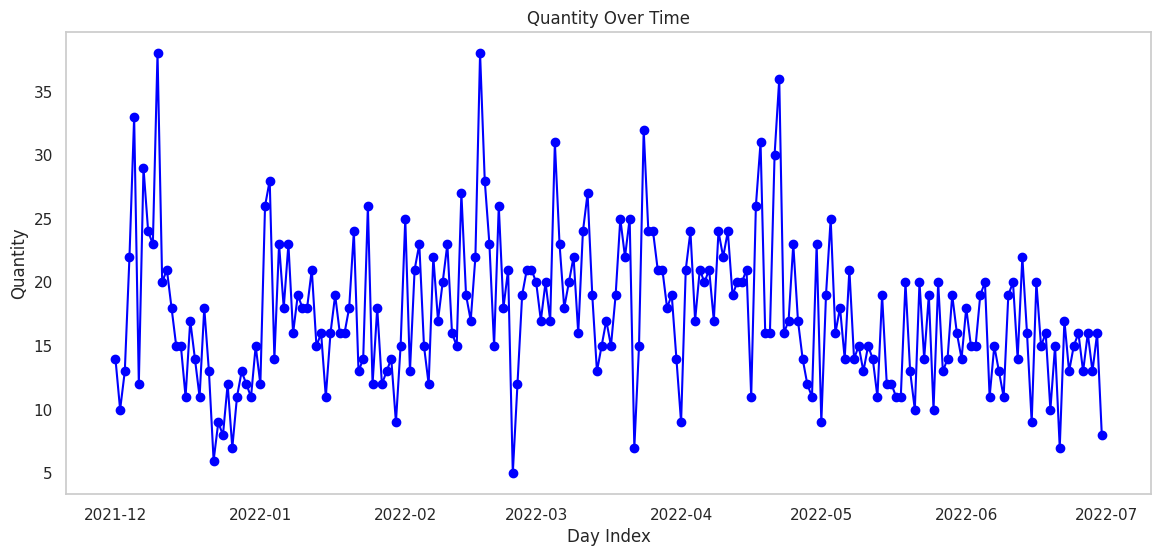

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data/cleaned.xlsx'
df = pd.read_excel(file_path)

# Plot Quantity over time (Day Index)
plt.figure(figsize=(14, 6))
plt.plot(df['Day Index'], df['Quantity'], color='blue', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid()
plt.show()

# **Feature Engineering**

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/cleaned.xlsx')

# Convert 'Day Index' to datetime format for date-based operations
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding 'Weekend' column (1 if the day is Saturday or Sunday, otherwise 0)
dataset['Weekend'] = dataset['Day Index'].dt.weekday.isin([5, 6]).astype(int)

# Adding 'Day of Week' and 'Month Name' columns
dataset['Day of Week'] = dataset['Day Index'].dt.day_name()
dataset['Month Name'] = dataset['Day Index'].dt.month_name()

# Adding one-hot encoded columns for each day of the week and month, ensuring all values are 0 or 1
day_dummies = pd.get_dummies(dataset['Day of Week'], prefix='', prefix_sep='').astype(int)
month_dummies = pd.get_dummies(dataset['Month Name'], prefix='', prefix_sep='').astype(int)
dataset = pd.concat([dataset, day_dummies, month_dummies], axis=1)

# Save the modified dataset to a new Excel file named 'enhanced.xlsx'
dataset.to_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx', index=False)

print("Enhanced dataset saved to 'enhanced_file.xlsx'")


Enhanced dataset saved to 'enhanced_file.xlsx'


In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/cleaned.xlsx')

# Convert 'Day Index' to datetime format for date-based operations
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

#Adding Month Name column
dataset['Month Name'] = dataset['Day Index'].dt.month_name()
month_dummies = pd.get_dummies(dataset['Month Name'], prefix='', prefix_sep='').astype(int)


# 1) Adding 'Weekend' column (1 if the day is Saturday or Sunday, otherwise 0)
dataset['Weekend'] = dataset['Day Index'].dt.weekday.isin([5, 6]).astype(int)

# 2) Adding 'Day of Week' column
dataset['Day of Week'] = dataset['Day Index'].dt.day_name()

# 3-9) Adding columns for each day of the week (1 if that day, otherwise 0)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    dataset[day] = (dataset['Day of Week'] == day).astype(int)

# 10-21) Adding columns for each month (1 if the date is in that month, otherwise 0)
months_of_year = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
for i, month in enumerate(months_of_year, start=1):
    dataset[month] = (dataset['Day Index'].dt.month == i).astype(int)


# Save the modified dataset to a new Excel file named 'enhanced.xlsx'
dataset.to_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx', index=False)

print("Enhanced dataset saved to 'enhanced_file.xlsx'")

Enhanced dataset saved to 'enhanced_file.xlsx'


# **ADDING NEW COLUMNS TO THE DATASET**

In [ ]:
import pandas as pd

# Loading the data
data = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Setting display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Displaying all rows of the dataset
data.head(len(data))




,Day Index,Quantity,Impressions,Clicks,imputed_Quantity,Month Name,Weekend,Day of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December
0,2021-12-01,14,620,445,14.00,December,0,Wednesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,10,890,433,10.00,December,0,Thursday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,13,851,424,13.00,December,0,Friday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,22,881,427,22.00,December,1,Saturday,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2021-12-05,33,678,451,30.67,December,1,Sunday,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,2021-12-06,12,995,429,12.00,December,0,Monday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2021-12-07,29,910,444,29.00,December,0,Tuesday,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2021-12-08,24,867,431,24.00,December,0,Wednesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,2021-12-09,23,1128,456,23.00,December,0,Thursday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,2021-12-10,38,1129,391,30.67,December,0,Friday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# **Exploratory Data Analysis (EDA)**

# ***Descriptive Statistics:***

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
df = pd.read_excel(file_path)

# Get descriptive statistics
descriptive_stats = df.describe()

# Save descriptive statistics to an Excel file
output_file = '/content/drive/MyDrive/Data/distributions.xlsx'
descriptive_stats.to_excel(output_file, sheet_name='Descriptive Statistics')

# Display all rows and columns for the descriptive statistics
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the descriptive statistics in a styled format
styled_stats = descriptive_stats.style.set_properties(**{'border': '1px solid black', 'color': 'black'}) \
                    .set_table_styles([{
                        'selector': 'th',
                        'props': [('background-color', 'lightgrey'),
                                  ('border', '1px solid black')]
                    }, {
                        'selector': 'td',
                        'props': [('border', '1px solid black')]
                    }])

# Display styled output
styled_stats



,Day Index,Quantity,Impressions,Clicks,imputed_Quantity,Weekend,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December
count,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,2022-03-16 12:00:00,17.542453,1531.702830,358.202830,17.430896,0.283019,0.141509,0.141509,0.146226,0.146226,0.141509,0.141509,0.141509,0.146226,0.132075,0.146226,0.141509,0.146226,0.141509,0.000000,0.000000,0.000000,0.000000,0.000000,0.146226
min,2021-12-01 00:00:00,5.000000,620.000000,60.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-01-22 18:00:00,13.750000,1209.750000,154.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-03-16 12:00:00,17.000000,1460.000000,402.500000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-05-08 06:00:00,21.000000,1862.000000,492.750000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022-06-30 00:00:00,38.000000,2707.000000,726.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
std,nan,5.790423,440.660783,164.521600,5.467691,0.451532,0.349371,0.349371,0.354169,0.354169,0.349371,0.349371,0.349371,0.354169,0.339374,0.354169,0.349371,0.354169,0.349371,0.000000,0.000000,0.000000,0.000000,0.000000,0.354169


# **DATA ANALYSIS**

# **Pie Chart for percentage of Quantity,Clicks & Impression**

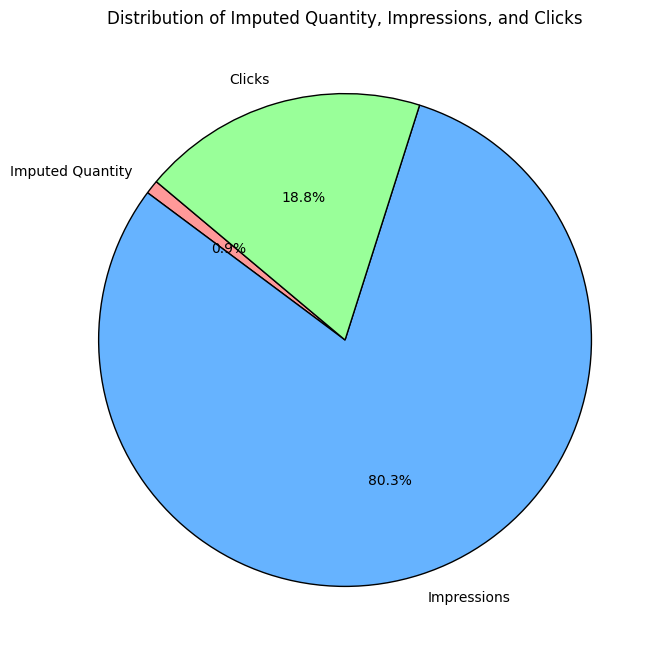

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names

# Load the data from the first sheet to inspect the content
data = excel_data.parse('Sheet1')

# Display the first few rows to understand the structure
data.head()

import matplotlib.pyplot as plt

# Calculate the sum for each relevant column
imputed_quantity_sum = data['imputed_Quantity'].sum()
impressions_sum = data['Impressions'].sum()
clicks_sum = data['Clicks'].sum()

# Data for pie chart
labels = ['Imputed Quantity', 'Impressions', 'Clicks']
sizes = [imputed_quantity_sum, impressions_sum, clicks_sum]
colors = ['#ff9999','#66b3ff','#99ff99']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Imputed Quantity, Impressions, and Clicks')
plt.show()


**Here is the pie chart showing the distribution of "Imputed Quantity," "Impressions," and "Clicks" based on their totals. The chart provides a visual representation of each category's proportion relative to the others**

# **Scatter Plots Analysis**

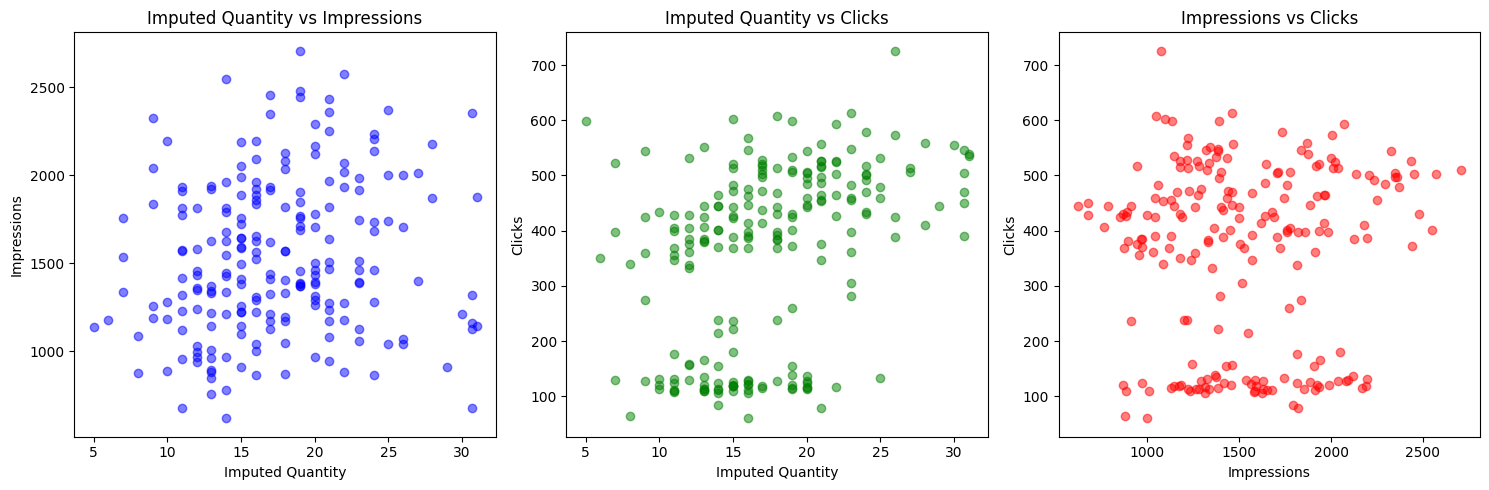

In [ ]:
# Scatter plot for pairwise analysis among "imputed quantity", "clicks", and "impressions"

# Set the plot size
plt.figure(figsize=(15, 5))

# Scatter plot 1: Imputed Quantity vs Impressions
plt.subplot(1, 3, 1)
plt.scatter(data['imputed_Quantity'], data['Impressions'], color='b', alpha=0.5)
plt.xlabel('Imputed Quantity')
plt.ylabel('Impressions')
plt.title('Imputed Quantity vs Impressions')

# Scatter plot 2: Imputed Quantity vs Clicks
plt.subplot(1, 3, 2)
plt.scatter(data['imputed_Quantity'], data['Clicks'], color='g', alpha=0.5)
plt.xlabel('Imputed Quantity')
plt.ylabel('Clicks')
plt.title('Imputed Quantity vs Clicks')

# Scatter plot 3: Impressions vs Clicks
plt.subplot(1, 3, 3)
plt.scatter(data['Impressions'], data['Clicks'], color='r', alpha=0.5)
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Impressions vs Clicks')

# Display the scatter plots
plt.tight_layout()
plt.show()



1. **Imputed Quantity vs. Impressions**
   - **Insights**: This scatter plot can reveal if there's a relationship between the quantity imputed and the number of impressions. For example, a positive correlation (upward trend) would suggest that as the imputed quantity increases, impressions also increase, indicating a possible dependency.

2. **Imputed Quantity vs. Clicks**
   - **Insights**: This plot helps in understanding if a higher imputed quantity impacts user engagement (clicks). A trend here would suggest that changes in quantity influence user actions or interest.

3. **Impressions vs. Clicks**
   - **Insights**: This scatter plot is particularly valuable, as it shows if impressions (how often an item was viewed) correlate with clicks (actual interactions). A strong positive correlation would indicate that more impressions generally lead to more clicks, while a lack of correlation might suggest other factors affect clicks independently of impressions.

### Overall Interpretation:
By observing these scatter plots, you can identify trends, clusters, or outliers. Strong correlations or patterns suggest potential dependencies, while scattered or random points indicate independence. These insights can help in targeting areas for optimization, such as increasing clicks through better impressions or adjusting imputed quantities based on observed demand.

# **Pair Plot of Imputed Quantity, Clicks, and Impressions**

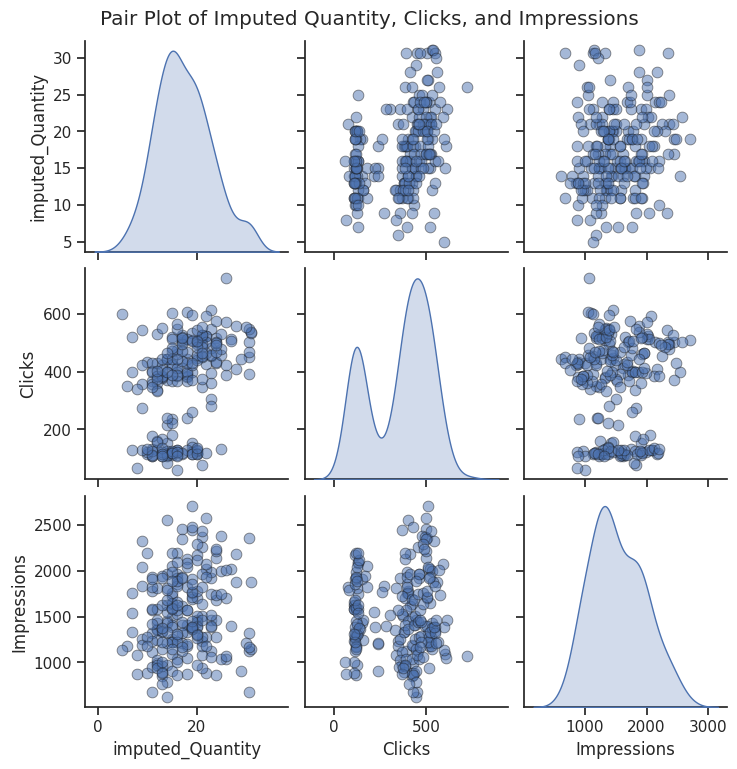

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names

# Load the data from the first sheet to inspect the content
data = excel_data.parse('Sheet1')

# Selecting only the relevant columns for the pair plot
data_subset = data[['imputed_Quantity', 'Clicks', 'Impressions']]

# Set the plot style
sns.set(style="ticks")

# Create the pair plot
sns.pairplot(data_subset, diag_kind="kde", plot_kws={'alpha':0.5, 's':60, 'edgecolor':'k'})

# Show the plot
plt.suptitle('Pair Plot of Imputed Quantity, Clicks, and Impressions', y=1.02)
plt.show()




### Insights
- **Scatter Patterns**: Each scatter plot reveals relationships between pairs of variables:
  - If points form a linear pattern, it indicates a potential correlation.
  - A dense cluster of points can signify common value ranges.
- **KDE Plots**: The diagonal shows the distribution for each variable, helping identify whether data is skewed, normal, or has multiple peaks.

This pair plot will provide a comprehensive view of possible correlations, helping you assess whether higher values in one variable relate to increases or decreases in another.

# **Histogram for Frequency Distribution**

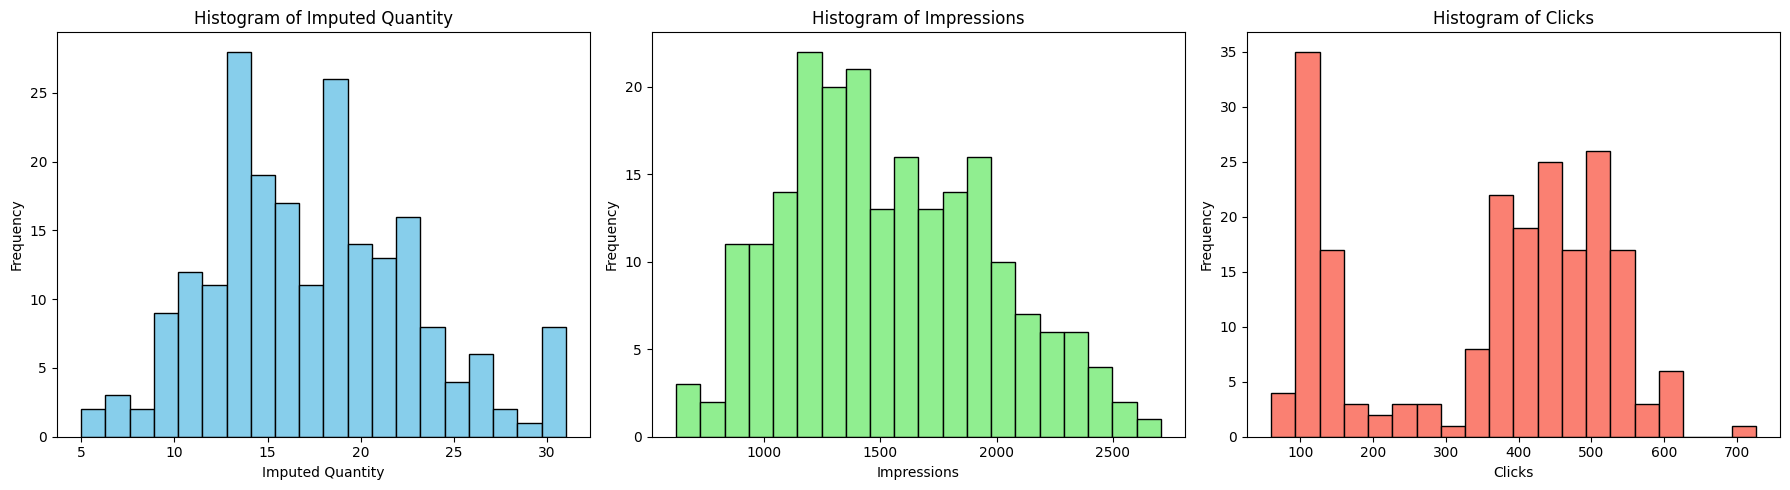

In [ ]:
import matplotlib.pyplot as plt

# Set the plot size for better readability
plt.figure(figsize=(18, 5))

# Histogram for Imputed Quantity
plt.subplot(1, 3, 1)
plt.hist(data['imputed_Quantity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Imputed Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Imputed Quantity')

# Histogram for Impressions
plt.subplot(1, 3, 2)
plt.hist(data['Impressions'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.title('Histogram of Impressions')

# Histogram for Clicks
plt.subplot(1, 3, 3)
plt.hist(data['Clicks'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.title('Histogram of Clicks')

# Display the histograms
plt.tight_layout()
plt.show()


**Purpose:** Histograms reveal the frequency distribution of each variable ("imputed quantity," "clicks," and "impressions").

**Plot:** Individual histograms for each variable, showing counts of data points within different ranges.

**Insights:** Useful for identifying the skewness, normality, or unusual data concentrations within each variable.

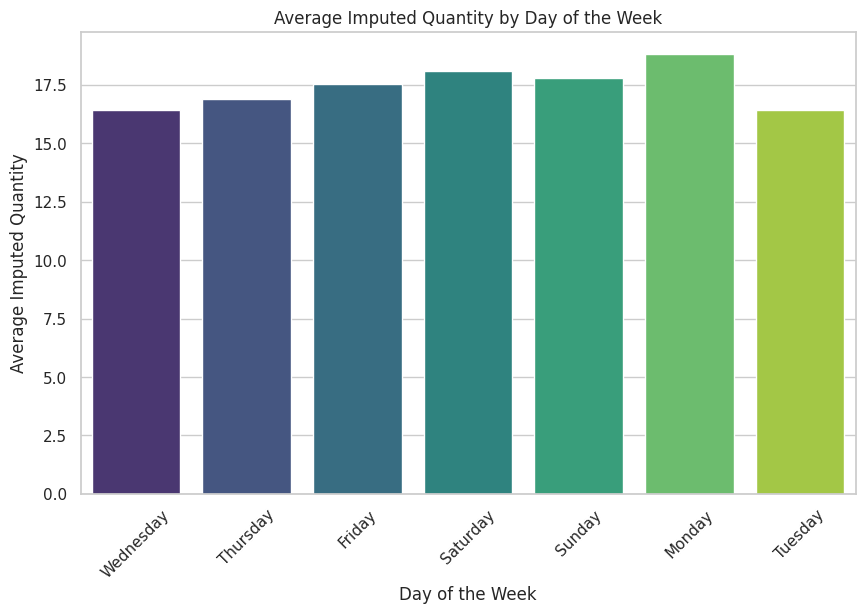

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path)

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set up the plot style
sns.set(style="whitegrid")

# Plot the average imputed quantity per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Day of Week', y='imputed_Quantity', estimator='mean', ci=None, palette='viridis')
plt.title('Average Imputed Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Imputed Quantity')
plt.xticks(rotation=45)
plt.show()



Here are a few specific insights I was gaining:

- **High or Low Days**: Certain days were consistently showing higher or lower averages, indicating a possible weekly pattern or trend, such as higher imputed quantities on specific business days.
- **Operational Efficiency**: Recognizing these patterns was helping me better understand resource allocation or inventory planning needs. For instance, if the imputed quantity peaked on Wednesdays and Thursdays, it suggested that these might be busier days requiring more resources.
- **Potential Anomalies**: If any particular day deviated significantly from others, it was hinting at anomalies, seasonality, or special circumstances affecting data on those specific days.


# **Correlation Heatmap**

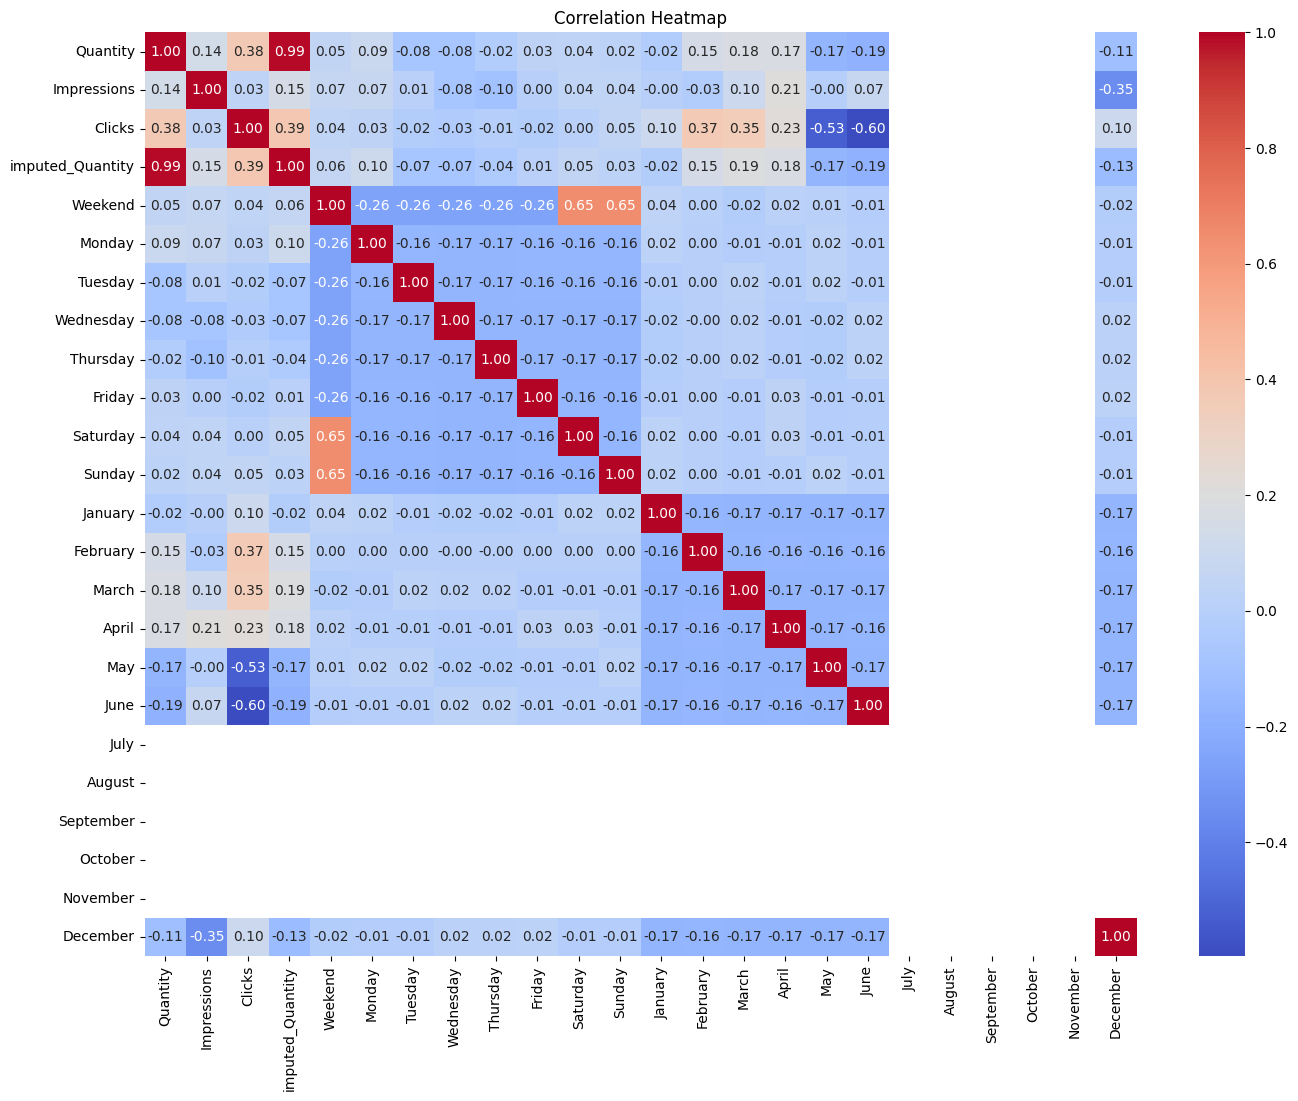

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_data = dataset.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Through the above correlation heatmap we can say that**

*   Clicks have good correlation with Quantity

*   Impressions also have slight relation with Quantity

*   Impressions have tiny relation with Clicks






I was using a correlation heatmap to understand relationships between variables in my dataset. It provided a visual summary of how each pair of variables correlated. Here's what I gained:

1. **Strength and Direction of Relationships**: I saw how each pair of variables was correlated, with values close to 1 indicating a strong positive relationship, -1 showing a negative one, and 0 showing weak or no correlation. For example, I found that higher "imputed quantity" correlated with higher "impressions."

2. **Key Influencers**: I identified closely related variables. For example, I noticed that more "impressions" generally led to more "clicks," suggesting that optimizing impressions could boost clicks.

3. **Redundancies**: I spotted redundant variables, like "imputed quantity" and "quantity," which had high correlation, helping me simplify my dataset by focusing on one.

4. **Outliers and Patterns**: I detected unexpected relationships, like weak correlations between "clicks" and "impressions," prompting me to explore potential outliers or missing data.

The heatmap helped me quickly visualize these insights, guiding further analysis and decision-making.

# **Statistical Summary**

I was analyzing the **Quantity** column, which represented the daily quantity of items sold, allowing me to identify trends in demand. I was noticing that higher values were indicating periods of increased sales, which could have been due to seasonal trends, promotions, or weekends. The daily variations in quantity were showing potential fluctuations in demand, which seemed to be correlating with specific days of the week or months.

When I was examining **Impressions and Clicks**, these columns were giving me insights into online engagement and user interest, especially from a digital marketing or e-commerce perspective. The impressions were indicating how many times the items were displayed, while the clicks showed how often they were interacted with.

I was also looking into **imputed_Quantity**, which appeared to provide estimated values for quantities where original data might have been missing. By comparing this with the actual Quantity column, I was able to evaluate the accuracy of these imputed values and determine how closely they aligned with actual sales trends.

The **Temporal Variables** such as "Day of Week" and "Weekend" were allowing me to examine if there were consistent patterns across specific days or weekends. I was noticing, for example, that weekends could show varying sales due to shopping behaviors. The "Month Name" column, along with one-hot encoded variables for each month, was giving me insights into monthly or seasonal variations in demand.

Lastly, I was observing **Seasonal and Day-Based Patterns** through the one-hot encoded month columns, which helped me track seasonal trends directly. Higher quantities during specific months, such as December, were suggesting a strong seasonal influence, likely from holiday sales. Similarly, by observing trends based on days like "Monday" or "Friday," I was noticing patterns that might indicate day-specific demand spikes, such as on weekends.